<IPython.core.display.Javascript object>


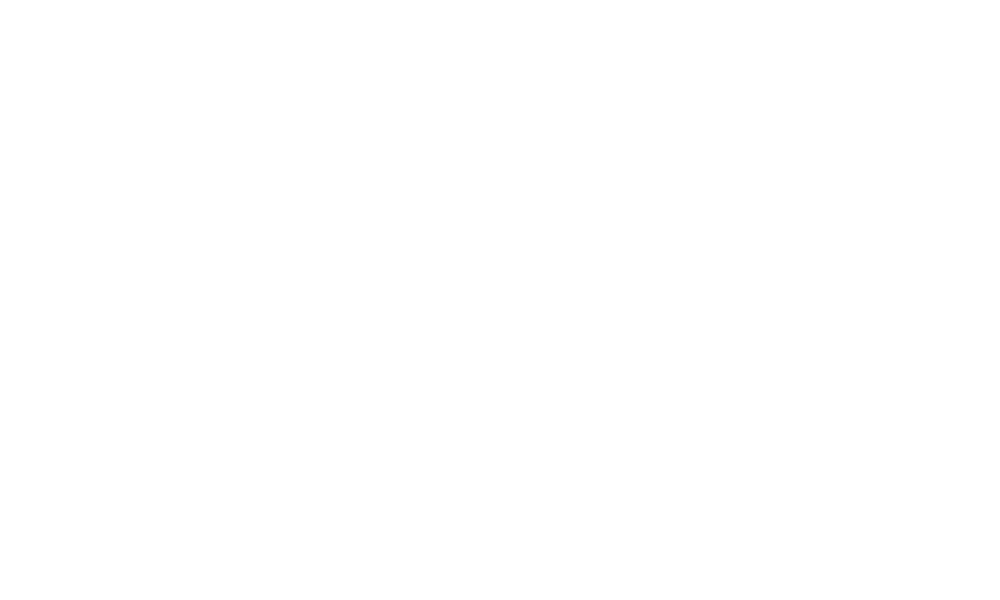

In [1]:
%matplotlib notebook
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import tensorflow as tf
from IPython.display import HTML
import matplotlib.animation as animation
from sklearn.decomposition import  PCA,TruncatedSVD,FastICA
# from utils import Visualize
from dataloader import DataLoader
import config

In [5]:
plt.rcParams['text.usetex'] = False
plt.rcParams['font.size'] = 12

tf.random.set_seed(42)

In [3]:
# load some test data for demonstration and plot a wireframe
dl = DataLoader(config.data['file_path2'],keepdims=False, crop_dims= (128,128) )
dl.load()
dl.project3D(FastICA, n_components = 3)

7501  1 second audio samples created successfully
 Successfully projected 128 to 3 dimensions using FastICA(n_components=


<IPython.core.display.Javascript object>


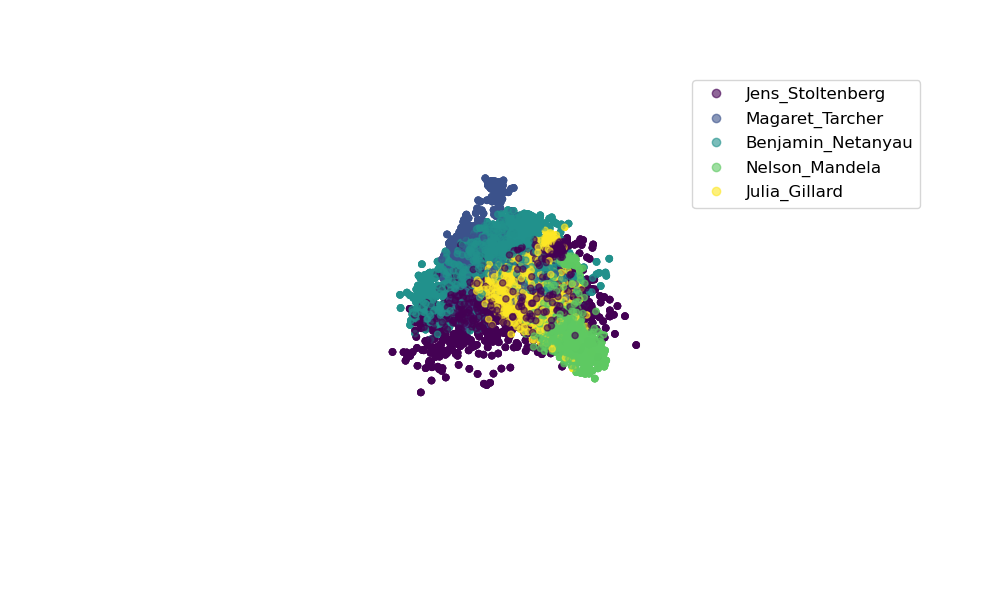

In [6]:
fig = plt.figure(1,figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')
ax.grid(False)
ax.set_axis_off()

def init():
    scatter = ax.scatter(dl.X_projection[:,0], dl.X_projection[:,1], dl.X_projection[:,2], c=list(dl.y),marker='o', s=20, alpha=0.6)
    ax.set_xlabel(r"$x_1$")
    ax.set_ylabel("$x_2$")
    ax.set_zlabel("$x_3$")
    ax.legend(handles=scatter.legend_elements()[0], labels=dl.CLASSES,bbox_to_anchor=(1.4, 1.0))
    return fig,

def animate(i):
    ax.view_init(elev=30., azim=3.6*i)
    return fig,

# Animate
ani = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=360, interval=100, blit=True)    

HTML(ani.to_html5_video())

In [8]:
ani.save('./Figures/animation_SVD_Speeches.mp4',dpi=300,savefig_kwargs={'frameon': False,'pad_inches': 'tight'})
%cd Figures
!ffmpeg -i animation_SVD_Speeches.mp4 -filter:v fps=fps=30 animation_SVD_Speeches.gif
%cd ..

<ipython-input-8-d0e982fcc94f>:1: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "frameon" which is no longer supported as of 3.3 and will become an error two minor releases later
  ani.save('./Figures/animation_SVD_Speeches.mp4',dpi=300,savefig_kwargs={'frameon': False,'pad_inches': 'tight'})


/net/store/cv/users/ybrima/RTGCompCog/ChimCLR/Figures
ffmpeg version 4.4.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 9.4.0 (GCC)
  configuration: --prefix=/net/store/cv/users/ybrima/miniconda3/envs/CV --cc=/home/conda/feedstock_root/build_artifacts/ffmpeg_1636205340875/_build_env/bin/x86_64-conda-linux-gnu-cc --disable-doc --disable-openssl --enable-avresample --enable-demuxer=dash --enable-gnutls --enable-gpl --enable-hardcoded-tables --enable-libfreetype --enable-libopenh264 --enable-vaapi --enable-libx264 --enable-libx265 --enable-libaom --enable-libsvtav1 --enable-libxml2 --enable-libvpx --enable-pic --enable-pthreads --enable-shared --disable-static --enable-version3 --enable-zlib --enable-libmp3lame --pkg-config=/home/conda/feedstock_root/build_artifacts/ffmpeg_1636205340875/_build_env/bin/pkg-config
  libavutil      56. 70.100 / 56. 70.100
  libavcodec     58.134.100 / 58.134.100
  libavformat    58. 76.100 / 58. 76.100
  libavdevice    58. 13.100 / 58. 13.1